<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)

Your goal: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of **token frequency**. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

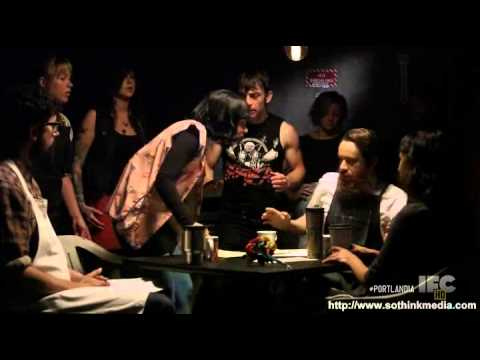

In [131]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/shahnam/ds/repos/ML_NLP/module1-text-data'

In [ ]:
## instal requirements if not yet
# !wget "https://raw.githubusercontent.com/skhabiri/ML-NLP/main/requirements.txt"
# !pip install -r requirements.txt

In [ ]:
## download and install spacy
# !python -m spacy download en_core_web_lg

In [2]:
import pandas as pd

url = "https://github.com/skhabiri/ML-NLP/blob/main/module1-text-data/data/yelp_coffeeshop_review_data.csv?raw=true"

shops = pd.read_csv(url)
shops.tail(20)

,coffee_shop_name,full_review_text,star_rating
7596,The Steeping Room,12/3/2015 I had the best experience at this r...,5.0 star rating
7597,The Steeping Room,1/3/2014 1 check-in Listed in 2014 Yelp 100 C...,4.0 star rating
7598,The Steeping Room,4/13/2015 I went to the steeping room today f...,5.0 star rating
7599,The Steeping Room,3/28/2015 1 check-in I am someone that hates ...,5.0 star rating
7600,The Steeping Room,5/10/2015 Great service with unimaginative an...,2.0 star rating
7601,The Steeping Room,2/22/2015 1 check-in Great selection of teas ...,4.0 star rating
7602,The Steeping Room,9/6/2015 2 check-ins I go here almost every w...,4.0 star rating
7603,The Steeping Room,3/15/2014 1 check-in Went here for lunch toda...,4.0 star rating
7604,The Steeping Room,10/25/2015 A few complaints about a wonderful...,4.0 star rating
7605,The Steeping Room,10/22/2015 I got the Chipotle Chocolate Chai ...,5.0 star rating


In [4]:
import re
shops.shape

(7616, 3)

In [7]:
shops["star_rating"][7615]

' 4.0 star rating '

In [8]:
# drop the wording after the digit rating
# r'' means for ex. \n is not enter but \ still is used as escape character
shops["star_rating"] = shops["star_rating"].apply(lambda comment: re.sub('(\d\.0).*', r'\1', comment))

In [9]:
""" 
a{6} will match exactly six 'a' characters
a{m,n}: match 'a' min of m and max of n times, tend to match the max, greedy
a{m,}: match 'a' min of m and not limit for max
a{m,n}? non-greedy version of a{m,n}, tend to match the minimum possible
"""
# Remove the date from the column, 12/3/2015
shops["full_review_text"] = shops["full_review_text"].apply(
    lambda comment: re.sub('\d\d?/\d\d?/\d{4}', '', comment))

In [10]:
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0
...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chan...,4.0
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do the...",5.0
7613,The Steeping Room,"Loved coming here for tea, and the atmospher...",4.0
7614,The Steeping Room,The food is just average. The booths didn't ...,3.0


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [11]:
shops['star_rating'].value_counts(ascending=False)

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

In [12]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')
        # wc['appears in'] maximum is the number of docs <= total_docs
        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# Union of two given sets is the smallest set which contains all the elements of both the sets
STOP_WORDS = nlp.Defaults.stop_words.union(['good','coffee','come', 'check', 'love', 'it', "it's", 'it.', 'the', 
                                            'this', 'try', 'like', 'little', 'work', 'in', 'come', 'go', 'get',
                                           'say', 'tell', 'bad', 'good', 'know', 'think', 'want', ''])

In [15]:
list(shops)

['coffee_shop_name', 'full_review_text', 'star_rating']

In [18]:
shops['star_rating'].value_counts(ascending=False)

 5.0    3780
 4.0    2360
 3.0     738
 2.0     460
 1.0     278
Name: star_rating, dtype: int64

In [19]:
worst = shops[shops['star_rating'] == shops['star_rating'].value_counts(ascending=False).index[-1]].copy()
best = shops[shops['star_rating'] == shops['star_rating'].value_counts(ascending=False).index[0]].copy()

In [144]:
# tokens = []

# for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
#     lemmas = []
    
#     for token in doc: 
#         if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS) and (token.pos_ != 'PRON'):
#             lemmas.append(token.lemma_.lower())
   
#     tokens.append(lemmas)
    
# shops['lemmas'] = tokens

In [20]:
# Wrap it all in a function
def get_lemmas(text):
    """ returns lemmas of a single doc
    """

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        # first condition is redundant
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON')  and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [21]:
# shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [22]:
best['lemmas'] = best['full_review_text'].apply(get_lemmas)

In [23]:
worst['lemmas'] = worst['full_review_text'].apply(get_lemmas)

In [58]:
print(best['lemmas'].head(1).values)
len(best['lemmas'].head(1).values.item())

[list(['', 'level', 'sweetness', 'idea', 'style', 'minute', 'ipad', 'latte', 'include', 'feather', 'fantastico', 'corner', 'matcha', 'get', 'selection', 'heart', 'list', 'checkout', 'hope', 'system', 'wine', 'order', 'atmosphere', 'find', 'love', 'possibility', 'typical', 'streamlined', 'beverage', 'shop', 'drink', 'range', 'art', 'pretty', 'muy', 'swing', 'desire'])]


37

In [38]:
import numpy as np
np.array([re.sub('[^a-zA-Z]', '', token.lower()) for token in best["lemmas"][0]])

array(['', '', 'love', 'atmosphere', 'corner', 'shop', 'style', 'swing',
       'order', 'matcha', 'latte', 'muy', 'fantastico', 'order', 'get',
       'drink', 'pretty', 'streamlined', 'order', 'ipad', 'include',
       'beverage', 'selection', 'range', 'wine', 'desire', 'level',
       'sweetness', 'checkout', 'system', 'get', 'latte', 'minute', '',
       'hope', 'typical', 'heart', 'feather', 'latte', 'find', 'list',
       'possibility', 'art', 'idea'], dtype='<U11')

In [39]:
# remove capitalization, not alphabetic letters
best["lemmas"] = best["lemmas"].apply(lambda comment: list(set([re.sub('[^a-zA-Z]', '', token.lower()) for token in comment])))

In [40]:
worst["lemmas"] = worst["lemmas"].apply(lambda comment: list(set([re.sub('[^a-zA-Z]', '', token.lower()) for token in comment])))

In [55]:
len(best['lemmas'].head(1).values.item())

37

In [59]:
# Remove None elements from list
best["lemmas"] = best["lemmas"].apply(lambda comment: [token for token in comment if token])

In [60]:
worst["lemmas"] = worst["lemmas"].apply(lambda comment: [token for token in comment if token])

In [61]:
wc_best = count(best['lemmas'])
wc_worst = count(worst['lemmas'])
wc_best.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
115,place,1863,1863,1.0,0.014928,0.014928,0.492857
285,great,1566,1566,2.0,0.012548,0.027476,0.414286
37,austin,1026,1026,3.0,0.008221,0.035697,0.271429
140,friendly,950,950,4.0,0.007612,0.043309,0.251323
302,delicious,803,803,5.0,0.006434,0.049743,0.212434


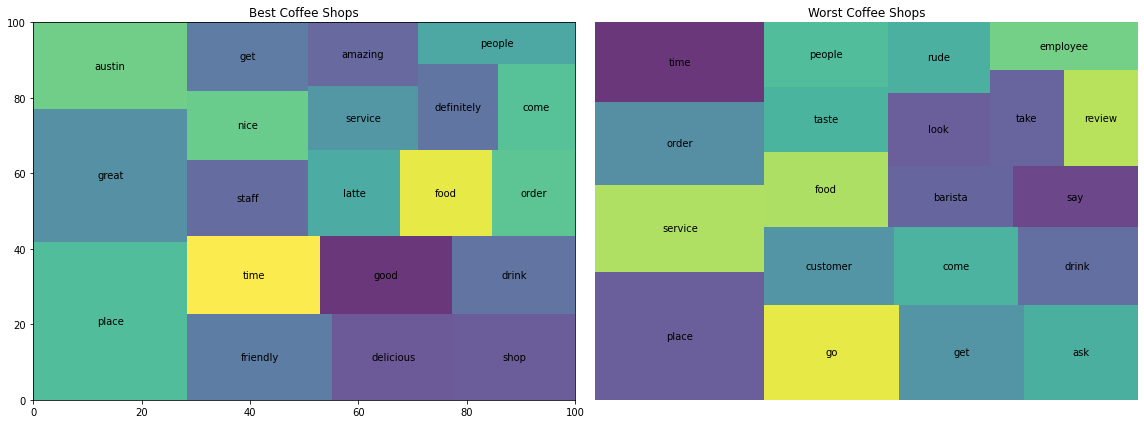

In [63]:
wc_best_top = wc_best[wc_best['rank'] <= 20]
wc_worst_top = wc_worst[wc_worst['rank'] <= 20]

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.title.set_text('Best Coffee Shops')

squarify.plot(sizes=wc_best_top['pct_total'], label=wc_best_top['word'], alpha=.8 )


ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text('Worst Coffee Shops')
squarify.plot(sizes=wc_worst_top['pct_total'], label=wc_worst_top['word'], alpha=.8 )

plt.axis('off')
fig.tight_layout()
plt.show()


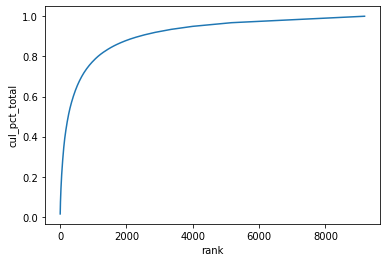

In [66]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_best);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

